In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt

In [2]:
#Read input image as 2D black- and white matrix
input_image = scipy.misc.imread('dna.png', flatten=False, mode='L')

In [3]:
#Flatten 2D image into 1D byte vector
input_bytes = np.ravel(input_image)

input_bits = ''
#Transform 1D byte vector to bit string
for i in range(0, len(input_bytes)) :
    input_byte = bin(int(input_bytes[i])).lstrip('0b')
    input_byte = ('0' * (8 - len(input_byte))) + input_byte
    input_bits += str(input_byte)

print('Number of bits: ' + str(len(input_bits)))

Number of bits: 524288


In [4]:
def Bits_to_DNA(bits):
    encode = {"00":"A","01":"C","10":"G","11":"T"} #create a encoding library
    dna = ""
    for x in range(len(bits)//2):
        dna += encode[bits[x*2:x*2+2]] #two bases at a time, encode and append into string "dna" according to the library
    return dna
dna = Bits_to_DNA(input_bits)

#str=把他當文字處理
#dna:ATCG
#len(dna)=長度
#print:'文字'＋str(文字化)
#int:常數/ float:with小數點/ str:文字/ booleans: T or F
#dna.find 執行'find' in 'dna',跑幾圈＝剛好第一個找到的位置 
print('Number of dna bases encoded: ' + str(len(dna)))
print('Position of first TG: ' + str(dna.find('TG')))
print('Position of first GGG: ' + str(dna.find('GGG')))

Number of dna bases encoded: 262144
Position of first TG: 1758
Position of first GGG: 28372


In [5]:
def fourmer_to_baseten(fourmer): #turn the fourmer into a number in base ten so it corresponds to a position in the array
    number = "" 
    for y in range(len(fourmer)): #convert former into a number in base 4
        if fourmer[y] == "A":
            number += "0"
        if fourmer[y] == "C":
            number += "1"
        if fourmer[y] == "G":
            number += "2"
        if fourmer[y] == "T":
            number += "3"
    baseten = 0              #convert from base 4 to base 10 to match the array
    baseten += int(number[0])*64
    baseten += int(number[1])*16
    baseten += int(number[2])*4
    baseten += int(number[3])
    return baseten

def get_4mer_counts(dna) :
    array = np.zeros(4 * 4 * 4 * 4)
    #建立空白array 
    #.zeros 給他（256）個0
    for x in range(len(dna)-3):
        #[]:用來建list  ex: a=['b', 'c',3],  a[0]=b, a[1]=c, a[0:2]=b,c
        fourmer = dna[x:x+4] #the fourmer in question in each for loop
        array[fourmer_to_baseten(fourmer)] += 1 #plus one to the corresponding location in the array     
    return array

mer4_counts = get_4mer_counts(dna)
#this step for print min, max, don't have to run 2 times.
print('Minimum 4-mer count: ' + str(np.min(mer4_counts)))
print('Maximum 4-mer count: ' + str(np.max(mer4_counts)))
print("count of 4-mer AGAG: " + str(mer4_counts[fourmer_to_baseten("AGAG")]))

Minimum 4-mer count: 73.0
Maximum 4-mer count: 197495.0
count of 4-mer AGAG: 283.0


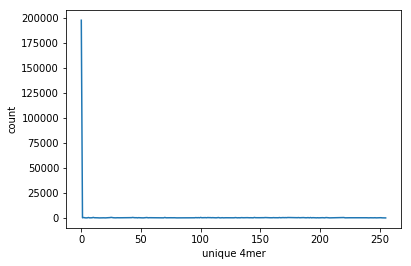

It's like empty in the plot, but there is a giant peak at 0000,
because most of the image is white background, presumably coded as 00000000.
The fact that overlapping 4-mers are each counted further increases the number of AAAA when multiple A's are chained together
e.g. AAAAAAAT is 4AAAAs and only 1AAAT


In [6]:
plt.plot(get_4mer_counts(dna))
plt.xlabel('unique 4mer')
plt.ylabel('count')
plt.show()
print ("It's like empty in the plot, but there is a giant peak at 0000,")
print ("because most of the image is white background, presumably coded as 00000000.")
print ("The fact that overlapping 4-mers are each counted further increases the number of AAAA when multiple A's are chained together")
print ("e.g. AAAAAAAT is 4AAAAs and only 1AAAT")

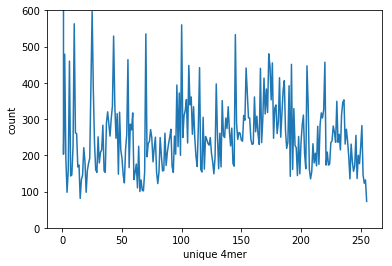

In [7]:
plt.plot(get_4mer_counts(dna))
plt.ylim(0,600)
plt.xlabel('unique 4mer')
plt.ylabel('count')
plt.show()

Number of dna bases encoded: 393216


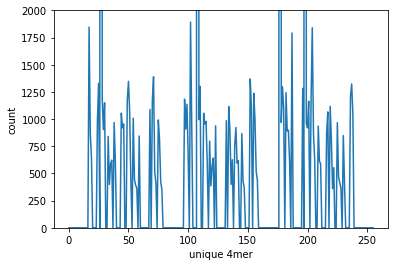

After dna_rotating, the high repetitive 4-mer are eliminated.
The next base is different with previous one, so the first showing 4-mer should be ACAC,
the corresbonded site of array should be 16, and also correspond the first peak showed in plot.
Hence, there are some regoins are totally count as zero.
Also, the maximal count are higher than the orignal one, bacause the overall unreapted 4-mer would rise after rotating.


In [16]:
f = open('dna_rotating_encoded.txt', 'r')
dna = f.readline()[:-1]
f.close()

print('Number of dna bases encoded: ' + str(len(dna)))

plt.plot(get_4mer_counts(dna))
plt.ylim(0,2000)
plt.xlabel('unique 4mer')  
plt.ylabel('count')
plt.show()

print ("After dna_rotating, the high repetitive 4-mer are eliminated.")
print ("The next base is different with previous one, so the first showing 4-mer should be ACAC,")
print ("the corresbonded site of array should be 16, and also correspond the first peak showed in plot.")
print ("Hence, there are some regoins are totally count as zero.")
print ("Also, the maximal count are higher than the orignal one, bacause the overall unreapted 4-mer would rise after rotating.")       

In [8]:
print ("Acknowledgemet:")
print ("The work above are directed by and discussed with Eric Yang.")

Acknowledgemet:
The work above are directed by and discussed with Eric Yang.
